In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
oliv = datasets.fetch_olivetti_faces()

In [7]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [8]:
oliv['data'].shape

(400, 4096)

In [10]:
oliv['images'].shape

(400, 64, 64)

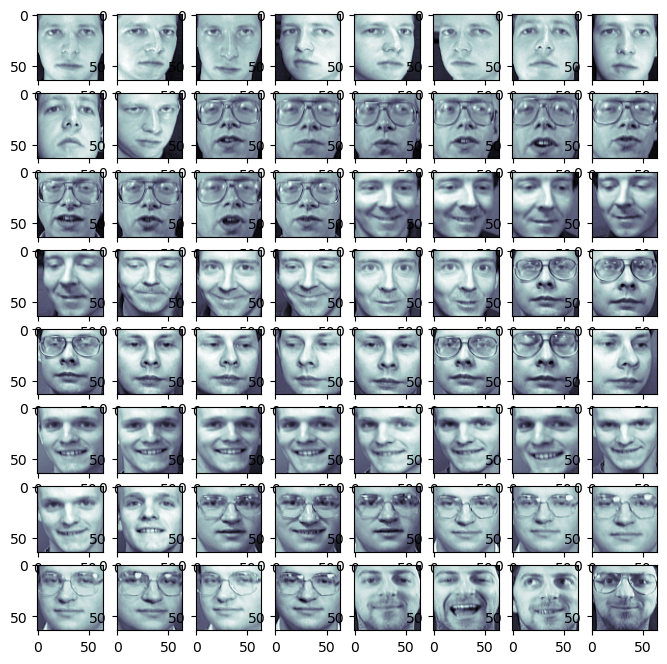

In [13]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i] ,cmap = plt.cm.bone)
plt.show()

In [14]:
x = oliv.data
y = oliv.target

In [15]:
pca = PCA()
pca.fit(x)

PCA()

In [17]:
pca.components_.shape

(400, 4096)

In [19]:
k = 0
total = sum(pca.explained_variance_)
currsum = 0
while currsum/total < 0.95:
    currsum += pca.explained_variance_[k]
    k=k+1
k
    

123

In [27]:
pca = PCA(n_components = k,whiten = True)
transformed_data = pca.fit_transform(x)
transformed_data.shape


(400, 123)

In [28]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [29]:
x_approx_images = x_approx.reshape((400,64,64))

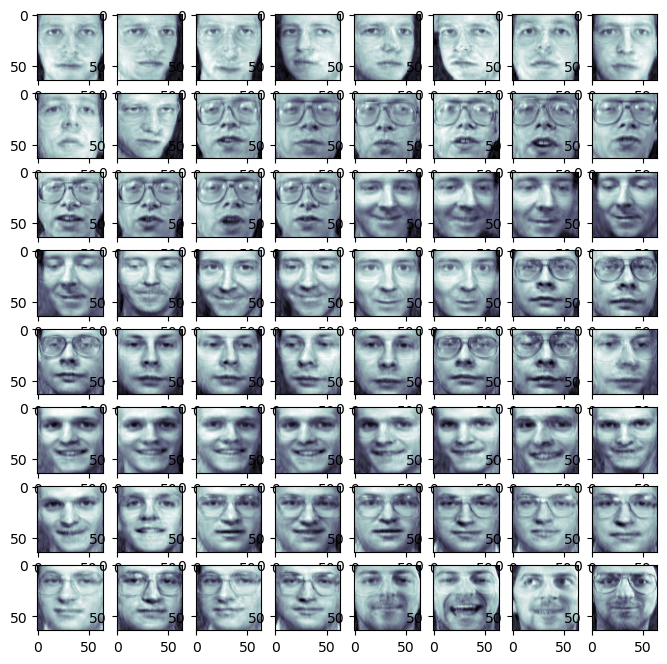

In [25]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i] ,cmap = plt.cm.bone)
plt.show()

In [31]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [32]:
eigenfaces = eigenv.reshape((123,64,64))

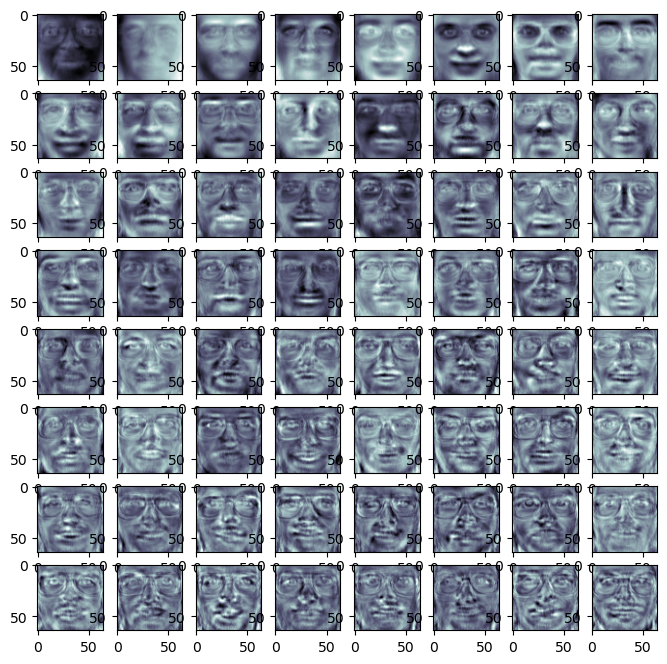

In [33]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i] ,cmap = plt.cm.bone)
plt.show()